# Lab 5: Gradient Descent
- **Author:** Emily Aiken ([emilyaiken@berkeley.edu](mailto:emilyaiken@berkeley.edu))
- **Date:** February 23, 2022
- **Course:** INFO 251: Applied machine learning

### Topics:
1. Define a function
2. Minimization: Closed-form solution
3. Minimization: Naive grid search
4. Minimization: Gradient descent
5. Your turn!

### Learning Objectives:
At the end of this lab, you will understand:
- Why gradient descent is more efficient than naive grid search
- How to derive and code up partial derivatives for gradient descent
- When gradient descent converges to local and global minima
- How the number of iterations, stopping conditions, the learning rate, and random seeds impact the convergence of gradient descent


### Resources:
- [List of convex functions](https://web.stanford.edu/class/ee364a/lectures/functions.pdf)
- [List of standard derivatives](https://www.mathcentre.ac.uk/resources/Engineering%20maths%20first%20aid%20kit/latexsource%20and%20diagrams/8_2.pdf)
- [Chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review)
- [Product rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-8/a/product-rule-review)

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I. Define a Function

Let's use a function with two inputs, $f(x,y)=x^2+(y+2)^2 + 5$.

In [277]:
# Define the function
def f(x, y):
    return x**2 + (y + 2)**2 + 5

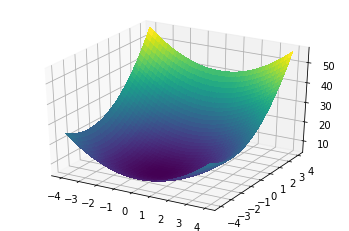

In [256]:
# Visualize the function
a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)

X, Y = np.meshgrid(a, b)
Z = f(X, Y)

sns.reset_orig()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
plt.show()

## II. Minimization: Closed-form solution

**Question**: What's the minimum of the function? Don't write any code.

**Answer**: The minimum value of the function is 5, with x = 0 and y = -2. 

## III. Minimization: Naive grid search

In [257]:
# Define a grid to search over
a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)
x, y = np.meshgrid(a, b)

# Calculate the value of the function at each point in the grid
z = f(x, y)

In [258]:
# Find the minimum value of the function
print('Minimum value of f: %.2f' % np.min(z))

# Get the arguments (x and y) at the minimum value of the function
min_y_idx, min_x_idx = np.unravel_index(np.argmin(z, axis=None), z.shape)
print('Arguments at minimum value of f: (%.2f, %.2f)' % (a[min_x_idx], b[min_y_idx]))

Minimum value of f: 5.00
Arguments at minimum value of f: (-0.00, -2.00)


In [259]:
# How many values did we have to search over to find the minimum?
print('Number of values tested: %i' % (len(a)*len(b)))

Number of values tested: 25600


## IV. Minimization: Gradient descent

**Question:** Calculate the *gradients* for the function. The gradients are the partial derivatives with respect to each of the inputs.

**Answer:**

$\frac{\partial f(x,y)}{\partial x} = 2x $ 

$\frac{\partial J_1(x,y)}{\partial y} = 2y + 4$


In [260]:
def gradient_descent(px, py, learning_rate, iterations):
    
    # Define lists to keep track of each function value visited
    xs_visited, ys_visited, zs_visited = [px], [py], [f(px, py)]
    
    for i in range(iterations):
        
        # Calculate the derivative at the point
        derivative_x = 2*px
        derivative_y = 2*py + 4
        
        # Move along the cost surface according to the derivative
        px = px - learning_rate * derivative_x
        py = py - learning_rate * derivative_y
        
        # Record the new values of the inputs (x and y) and the output (z, the function value)
        xs_visited.append(px)
        ys_visited.append(py)
        zs_visited.append(f(px, py))
    return xs_visited, ys_visited, zs_visited

In [261]:
# Run gradient descent for 10,0000 iterations, with a learning rate of 0.001. Fix the starting points at x=1
# and y=0.
x_path, y_path, z_path = gradient_descent(1, 0, 0.001, 10000)
print('Minimum value of f: %.2f' % z_path[-1])
print('Arguments at minimum value of f: (%.20f, %.20f)' % (x_path[-1], y_path[-1]))

Minimum value of f: 5.00
Arguments at minimum value of f: (0.00000000202028609024, -1.99999999595942656860)


In [262]:
# How many values did we have to visit to find the minimum?
print('Number of values tested: %i' % (len(z_path)))

Number of values tested: 10001


### A. Dig into what's happening at a few iterations

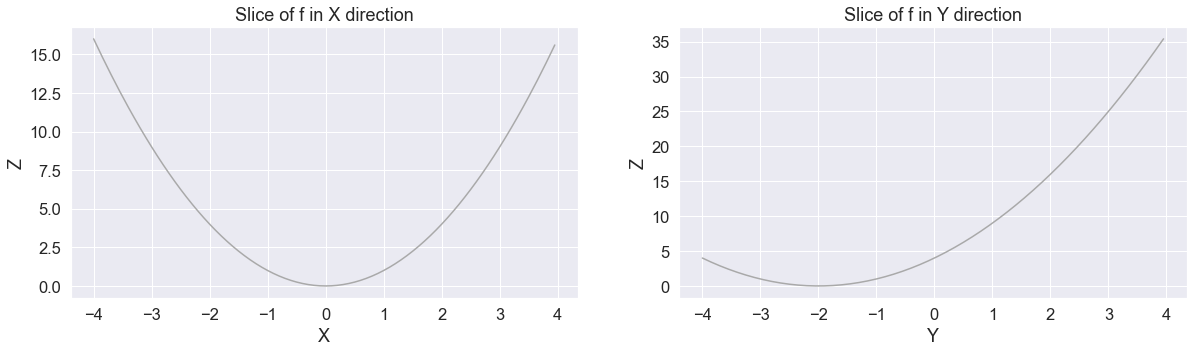

In [263]:
def f_slice_x(x):
    return x**2

def f_slice_y(y):
    return (y + 2)**2

sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)

ax[0].plot(a, f_slice_x(a), color='darkgrey')
ax[0].set_title('Slice of f in X direction')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Z')

ax[1].plot(b, f_slice_y(b), color='darkgrey')
ax[1].set_title('Slice of f in Y direction')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Z')

plt.show()

In [264]:
# Starting point
starting_x, starting_y = -3.5, 3

# Learning rate
learning_rate = 0.1

# Calculate the derivative
derivative_x = 2*starting_x
derivative_y = 2*starting_y + 4

# We will move along the cost surface according to the derivative
next_x = starting_x - learning_rate * derivative_x
next_y = starting_y - learning_rate * derivative_y

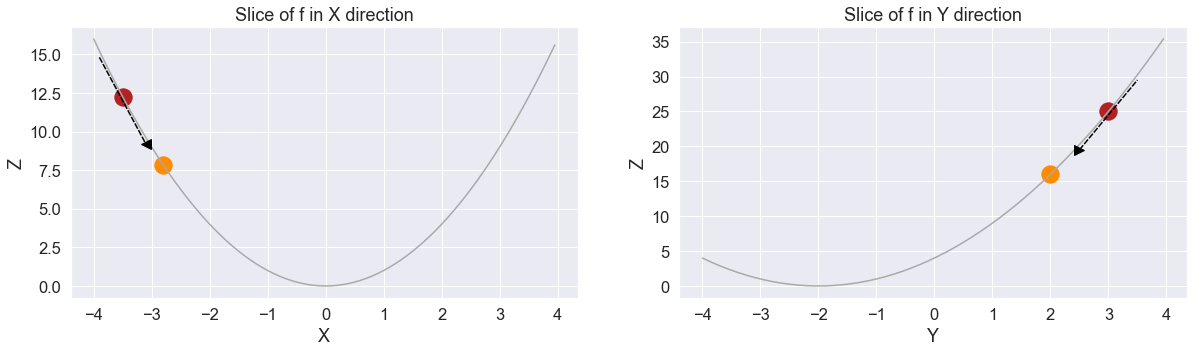

In [265]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)

# Plot the slice of the function in the direction of X
ax[0].plot(a, f_slice_x(a), color='darkgrey')
ax[0].set_title('Slice of f in X direction')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Z')

# Plot the slice of the function in the direction of X
ax[1].plot(b, f_slice_y(b), color='darkgrey')
ax[1].set_title('Slice of f in Y direction')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Z')

# Plot the starting points
ax[0].scatter([starting_x], [f_slice_x(starting_x)], color='firebrick', s=300)
ax[1].scatter([starting_y], [f_slice_y(starting_y)], color='firebrick', s=300)

# Plot the derivatives (tangent lines)
derivative_grid_x = np.linspace(starting_x-.4, starting_x+.4, 10)
ax[0].plot(derivative_grid_x, (derivative_x*derivative_grid_x - 12.5), color='black', dashes=[4, 1])
ax[0].plot(derivative_grid_x[-1], (derivative_x*derivative_grid_x - 12.5)[-1], color='black', 
           marker='<', markersize=10)
derivative_grid_y = np.linspace(starting_y-.5, starting_y+.5, 100)
ax[1].plot(derivative_grid_y, derivative_y*derivative_grid_y - 5.5, color='black', dashes=[4, 1])
ax[1].plot(derivative_grid_y[0], (derivative_y*derivative_grid_y - 5.5)[0], color='black', 
           marker='>', markersize=10)

# Plot the ending points
ax[0].scatter([next_x], [f_slice_x(next_x)], color='darkorange', s=300)
ax[1].scatter([next_y], [f_slice_y(next_y)], color='darkorange', s=300)


plt.show()

### B. Plot parameters as a function of the number of iterations
Sometimes the iteration number is referred to as the "epoch."

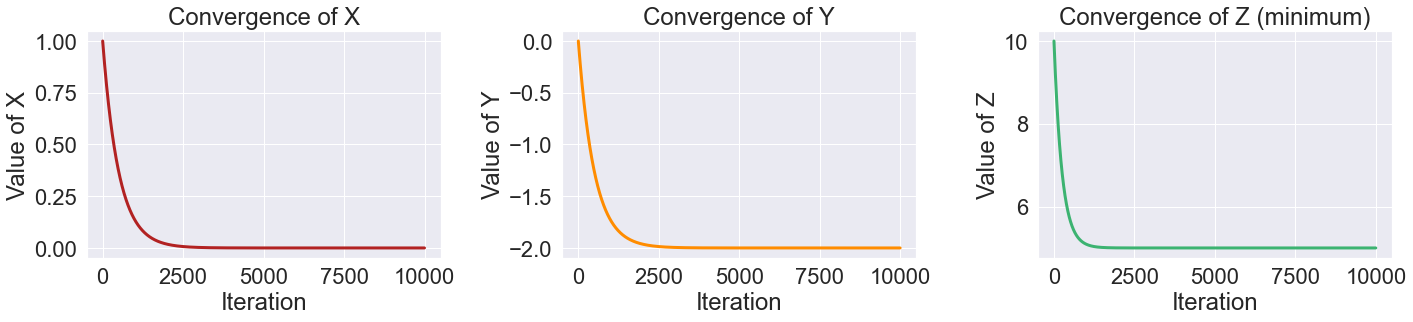

In [266]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(range(len(x_path)), x_path, color='firebrick', linewidth=3)
ax[0].set_title('Convergence of X')
ax[0].set_ylabel('Value of X')

ax[1].plot(range(len(y_path)), y_path, color='darkorange', linewidth=3)
ax[1].set_title('Convergence of Y')
ax[1].set_ylabel('Value of Y')

ax[2].plot(range(len(z_path)), z_path, color='mediumseagreen', linewidth=3)
ax[2].set_title('Convergence of Z (minimum)')
ax[2].set_ylabel('Value of Z')

for a in range(len(ax)):
    ax[a].set_xlabel('Iteration')
    
plt.tight_layout()
plt.show()

### C. Confirm that gradient descent converges no matter the random initialization

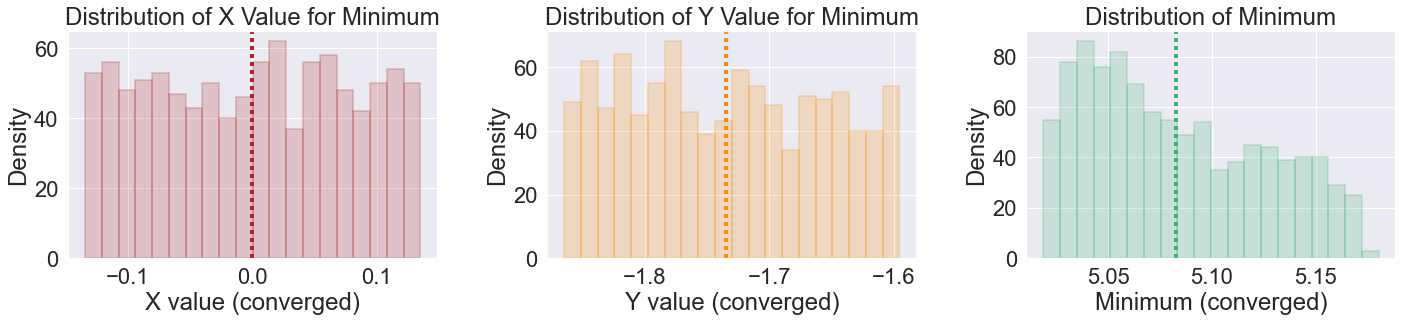

In [267]:
# Experiment with random initializations for gradient descent
x_mins, y_mins, z_mins = [], [], []
for i in range(1000):
    x_path, y_path, z_path = gradient_descent(np.random.rand()*2 - 1, np.random.rand()*2 - 1, 0.001, 1000)
    x_mins.append(x_path[-1])
    y_mins.append(y_path[-1])
    z_mins.append(z_path[-1])
    
sns.set(font_scale=2)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].hist(x_mins, color='firebrick', alpha=0.2, bins=20, edgecolor='firebrick', linewidth=2)
ax[0].axvline(np.mean(x_mins), dashes=[1, 1], color='firebrick', linewidth=4)
ax[0].set_title('Distribution of X Value for Minimum')
ax[0].set_xlabel('X value (converged)')

ax[1].hist(y_mins, color='darkorange', alpha=0.2, bins=20, edgecolor='darkorange', linewidth=2)
ax[1].axvline(np.mean(y_mins), dashes=[1, 1], color='darkorange', linewidth=4)
ax[1].set_title('Distribution of Y Value for Minimum')
ax[1].set_xlabel('Y value (converged)')

ax[2].hist(z_mins, color='mediumseagreen', alpha=0.2, bins=20, edgecolor='mediumseagreen', linewidth=2)
ax[2].axvline(np.mean(z_mins), dashes=[1, 1], color='mediumseagreen', linewidth=4)
ax[2].set_title('Distribution of Minimum')
ax[2].set_xlabel('Minimum (converged)')

for a in range(len(ax)):
    ax[a].set_ylabel('Density')

plt.tight_layout()
plt.show()

### D. Learning rates

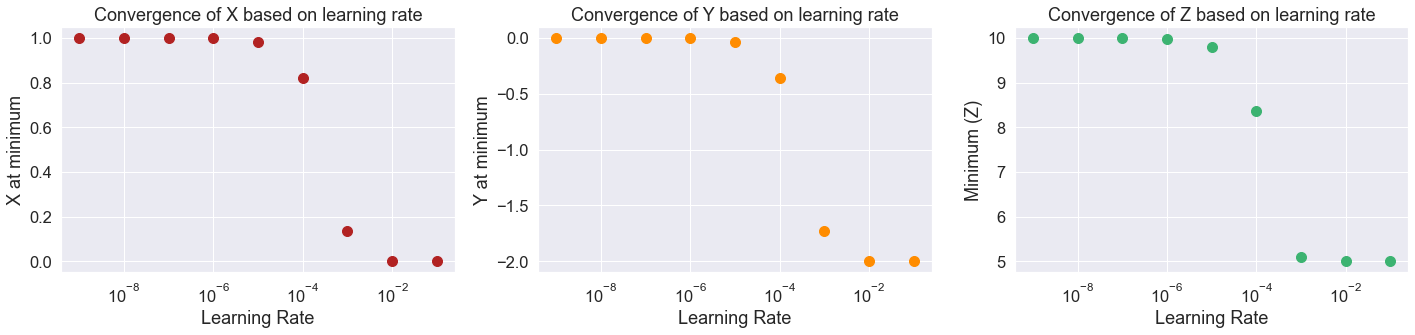

In [269]:
# How does the learning rate impact the convergence of gradient descent?
min_xs, min_ys, min_zs = [], [], []
learning_rate_grid = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
for learning_rate in learning_rate_grid:
    x_path, y_path, z_path = gradient_descent(1, 0, learning_rate, 1000)
    min_xs.append(x_path[-1])
    min_ys.append(y_path[-1])
    min_zs.append(z_path[-1])
    
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].scatter(learning_rate_grid, min_xs, s=100, color='firebrick')
ax[0].set_title('Convergence of X based on learning rate')
ax[0].set_ylabel('X at minimum')

ax[1].scatter(learning_rate_grid, min_ys, s=100, color='darkorange')
ax[1].set_title('Convergence of Y based on learning rate')
ax[1].set_ylabel('Y at minimum')

ax[2].scatter(learning_rate_grid, min_zs, s=100, color='mediumseagreen')
ax[2].set_title('Convergence of Z based on learning rate')
ax[2].set_ylabel('Minimum (Z)')

for a in range(len(ax)):
    ax[a].set_xscale('log')
    ax[a].set_xlabel('Learning Rate')
    
plt.tight_layout()
plt.show()

### E. Stopping conditions
One option is to set a number of iterations, and confirm that gradient descent has converged. Another option is to set a *stopping condition*, where we'll stop running gradient descent if *k* iterations in the row all have approximately the same value.

In [270]:
def gradient_descent(px, py, learning_rate, stopping_tolerance):
    
    # Define lists to keep track of each function value visited
    xs_visited, ys_visited, zs_visited = [np.inf, px], [np.inf, py], [np.inf, f(px, py)]
    
    while np.abs(xs_visited[-2] - xs_visited[-1]) > stopping_tolerance:
        
        # Calculate the derivative at the point
        derivative_x = 2*px
        derivative_y = 2*py + 4
        
        # Move along the cost surface according to the derivative
        px = px - learning_rate * derivative_x
        py = py - learning_rate * derivative_y
        
        # Record the new values of the inputs (x and y) and the output (z, the function value)
        xs_visited.append(px)
        ys_visited.append(py)
        zs_visited.append(f(px, py))
    return xs_visited, ys_visited, zs_visited

In [271]:
# Run gradient descent for 10,0000 iterations, with a learning rate of 0.001. Fix the starting points at x=1
# and y=0.
x_path, y_path, z_path = gradient_descent(1, 0, 0.001, 0.00001)
print('Minimum value of f: %.2f' % z_path[-1])
print('Arguments at minimum value of f: (%.20f, %.20f)' % (x_path[-1], y_path[-1]))

Minimum value of f: 5.00
Arguments at minimum value of f: (0.00498509373695704434, -1.99002981252608668328)


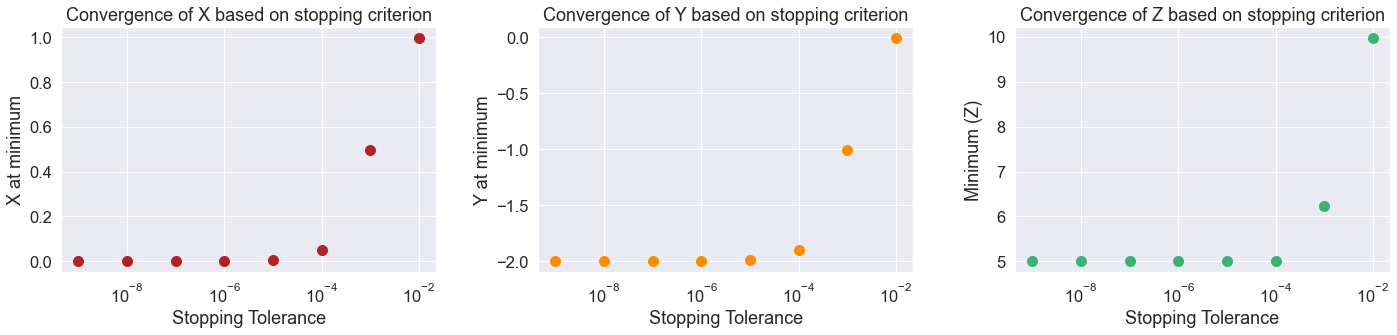

In [272]:
# How does the tolerance of the stopping criterion impact the convergence of gradient descent?
min_xs, min_ys, min_zs = [], [], []
tolerance_grid = [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
for stopping_tolerance in tolerance_grid:
    x_path, y_path, z_path = gradient_descent(1, 0, 0.001, stopping_tolerance)
    min_xs.append(x_path[-1])
    min_ys.append(y_path[-1])
    min_zs.append(z_path[-1])
    
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].scatter(tolerance_grid, min_xs, s=100, color='firebrick')
ax[0].set_title('Convergence of X based on stopping criterion')
ax[0].set_ylabel('X at minimum')

ax[1].scatter(tolerance_grid, min_ys, s=100, color='darkorange')
ax[1].set_title('Convergence of Y based on stopping criterion')
ax[1].set_ylabel('Y at minimum')

ax[2].scatter(tolerance_grid, min_zs, s=100, color='mediumseagreen')
ax[2].set_title('Convergence of Z based on stopping criterion')
ax[2].set_ylabel('Minimum (Z)')

for a in range(len(ax)):
    ax[a].set_xlabel('Stopping Tolerance')
    ax[a].set_xscale('log')
    
plt.tight_layout()
plt.show()

## V. Your turn!

This time, you'll work with the following function:

$f(x,y) = x^4  + yln(y^2)$.

Reminder: The default numpy logarithm (np.log) is a natural logarithm.

Reminder: The natural logarithm is only defined for x > 0.

In [279]:
# Define the function
def f(x, y):
    return x**4 + y*np.log(y**2)

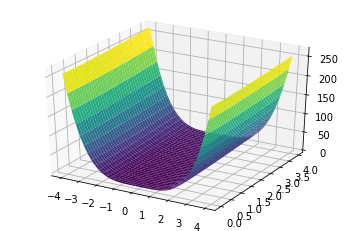

In [280]:
# Visualize the function
a = np.arange(-4, 4, 0.05)
b = np.arange(0.0001, 4, 0.05)

x, y = np.meshgrid(a, b)
z = f(x, y)

sns.reset_orig()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.show()

In [289]:
# Let's try minimizing with naive grid search
a = np.arange(-4, 4, 0.05)
b = np.arange(0.0001, 4, 0.05)
x, y = np.meshgrid(a, b)
z = f(x, y)

# Find the minimum value of the function
print('Minimum value of f: %.2f' % np.min(z))

# Get the arguments (x and y) at the minimum value of the function
min_y_idx, min_x_idx = np.unravel_index(np.argmin(z, axis=None), z.shape)
print('Arguments at minimum value of f: (%.2f, %.2f)' % (a[min_x_idx], b[min_y_idx]))

Minimum value of f: -0.73
Arguments at minimum value of f: (-0.00, 0.35)


**Question**: What are the partial derivatives of the function?

**Answer:**

$\frac{\partial f(x,y)}{\partial x} =  4x^3$ 

$\frac{\partial J_1(x,y)}{\partial y} = y(1/y^2)(2y) + ln(y^2) = ln(y^2) + 2$


In [290]:
# TODO: Use gradient descent to minimize the function.

In [291]:
def gradient_descent(px, py, learning_rate, iterations):
    
    # Define lists to keep track of each function value visited
    xs_visited, ys_visited, zs_visited = [px], [py], [f(px, py)]
    
    for i in range(iterations):
        
        # Do not allow the y value to go out of the range on which the logarithm is defined
        if py <= 0:
            py = 0.0000001
        
        # Calculate the derivative at the point
        derivative_x = 4*px**3
        derivative_y = np.log(py**2) + 2
        
        # Move along the cost surface according to the derivative
        px = px - learning_rate * derivative_x
        py = py - learning_rate * derivative_y
        
        # Record the new values of the inputs (x and y) and the output (z, the function value)
        xs_visited.append(px)
        ys_visited.append(py)
        zs_visited.append(f(px, py))
    return xs_visited, ys_visited, zs_visited

In [300]:
# Run gradient descent for 10,0000 iterations, with a learning rate of 0.001. Fix the starting points at x=1
# and y=0.
x_path, y_path, z_path = gradient_descent(20, 10, 0.001, 10000)
print('Minimum value of f: %.2f' % z_path[-1])
print('Arguments at minimum value of f: (%.20f, %.20f)' % (x_path[-1], y_path[-1]))

Minimum value of f: -0.74
Arguments at minimum value of f: (-0.11175519094295589817, 0.36787944117144744105)


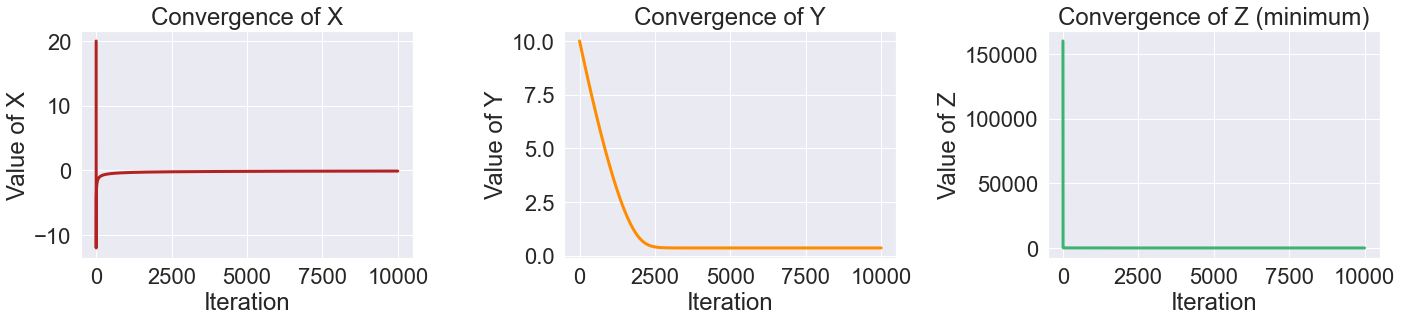

In [301]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(range(len(x_path)), x_path, color='firebrick', linewidth=3)
ax[0].set_title('Convergence of X')
ax[0].set_ylabel('Value of X')

ax[1].plot(range(len(y_path)), y_path, color='darkorange', linewidth=3)
ax[1].set_title('Convergence of Y')
ax[1].set_ylabel('Value of Y')

ax[2].plot(range(len(z_path)), z_path, color='mediumseagreen', linewidth=3)
ax[2].set_title('Convergence of Z (minimum)')
ax[2].set_ylabel('Value of Z')

for a in range(len(ax)):
    ax[a].set_xlabel('Iteration')
    
plt.tight_layout()
plt.show()